In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import scipy.stats as st

In [23]:
df = pd.read_csv('../source_data/game_data_all.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67571 entries, 0 to 67570
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             67571 non-null  int64  
 1   game                   67571 non-null  object 
 2   link                   67571 non-null  object 
 3   release                67571 non-null  object 
 4   peak_players           67571 non-null  int64  
 5   positive_reviews       67571 non-null  int64  
 6   negative_reviews       67571 non-null  int64  
 7   total_reviews          67571 non-null  int64  
 8   rating                 67571 non-null  float64
 9   primary_genre          67561 non-null  object 
 10  store_genres           67514 non-null  object 
 11  publisher              67110 non-null  object 
 12  developer              67443 non-null  object 
 13  detected_technologies  60265 non-null  object 
 14  store_asset_mod_time   67275 non-null  object 
 15  re

In [25]:
missing_data_in_columns = df.isna().any() #czy sa nany i gdzie
print(missing_data_in_columns)

Unnamed: 0               False
game                     False
link                     False
release                  False
peak_players             False
positive_reviews         False
negative_reviews         False
total_reviews            False
rating                   False
primary_genre             True
store_genres              True
publisher                 True
developer                 True
detected_technologies     True
store_asset_mod_time      True
review_percentage         True
players_right_now         True
24_hour_peak              True
all_time_peak            False
all_time_peak_date        True
dtype: bool


In [26]:
#właściwy kod na obliczenie wieku gry
df['release'] = pd.to_datetime(df['release'])
df['rok'] = df['release'].dt.year
df['game_age'] = 2024 - df['rok']
df.drop('rok', axis=1)

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,...,publisher,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date,game_age
0,0,Pizza Tower,/app/2231450/,2023-01-26,4529,19807,227,20034,96.39,Action (1),...,Tour De Pizza,Tour De Pizza,Engine.GameMaker; SDK.FMOD,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25,1
1,1,Resident Evil 4,/app/2050650/,2023-03-24,168191,61752,1616,63368,95.75,Action (1),...,CAPCOM Co. Ltd.,CAPCOM Co. Ltd.,Engine.RE_Engine; SDK.AMD_GPU_Services,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25,1
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,15543,12643,213,12856,95.54,Casual (4),...,SEGA,SEGA,Engine.Unity; SDK.UnityBurst; SDK.cURL,2023-03-24,98.0,618,776,15543,2023-03-31,1
3,3,Pineapple on pizza,/app/2263010/,2023-03-28,1415,11717,209,11926,95.39,Indie (23),...,Majorariatto,Majorariatto,Engine.Unity; SDK.cURL,2023-03-22,98.0,101,101,1415,2023-03-28,1
4,4,Hi-Fi RUSH,/app/1817230/,2023-01-25,6132,14152,324,14476,95.09,Action (1),...,Bethesda Softworks,Tango Gameworks,Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...,2023-04-11,97.0,630,664,6132,2023-01-29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67566,67566,Space Empires V,/app/1690/,2006-10-16,137,290,120,410,67.34,Strategy (2),...,Strategy First,Malfador Machinations,NaN,2019-10-29,70.0,8,12,137,2013-03-01,18
67567,67567,Iron Warriors: T-72 Tank Command,/app/1670/,2006-07-26,15,173,104,277,60.17,Strategy (2),...,Strategy First,Strategy First,NaN,2019-11-19,62.0,0,2,15,2014-03-01,18
67568,67568,Gumboy: Crazy Adventures,/app/2520/,2006-12-19,22,61,60,121,50.32,Unknown Genre (0),...,CINEMAX s.r.o.,CINEMAX s.r.o.,SDK.OpenAL; SDK.Vorbis,2022-11-04,50.0,0,1,22,2008-09-13,18
67569,67569,Shattered Union,/app/3960/,2006-10-25,13,71,70,141,50.27,Strategy (2),...,2K,PopTop,SDK.Bink_Video; SDK.Miles_Sound_System,2019-09-20,50.0,1,2,13,2020-03-15,18


In [27]:
df['game_age'].unique()

array([ 1,  8,  5, 11,  7,  4,  2,  3,  6,  9, 10, 15, 13, 14, 12, 17, 16,
       18])

In [28]:
df['primary_genre'].unique()

array(['Action (1)', 'Casual (4)', 'Indie (23)', 'RPG (3)',
       'Strategy (2)', 'Adventure (25)', 'Free to Play (37)',
       'Simulation (28)', 'Early Access (70)', 'Racing (9)',
       'Sports (18)', 'Massively Multiplayer (29)', 'Unknown Genre (0)',
       'Violent (73)', 'Design & Illustration (53)', nan, 'Gore (74)',
       'Sexual Content (71)', 'Education (54)', 'Nudity (72)',
       'Game Development (60)', 'Utilities (57)', 'Audio Production (52)',
       'Video Production (58)', 'Web Publishing (59)',
       'Unknown Genre (34)', 'Unknown Genre (33)', 'Unknown Genre (6)',
       'Unknown Genre (21)'], dtype=object)

In [29]:
category_to_drop = ['Unknown Genre (0)', 'Game Development (60)', 'Utilities (57)', 'Audio Production (52)', 'Video Production (58)', 'Web Publishing (59)', 'Free to Play (37)',
                    'Unknown Genre (34)', 'Unknown Genre (33)', 'Unknown Genre (6)', 'Unknown Genre (21)', 'Design & Illustration (53)', 'Massively Multiplayer (29)']
rows_to_drop = df[df['primary_genre'].isin(category_to_drop)].index
df.drop(rows_to_drop, inplace=True)

In [30]:
category = df['primary_genre'].unique()
category

array(['Action (1)', 'Casual (4)', 'Indie (23)', 'RPG (3)',
       'Strategy (2)', 'Adventure (25)', 'Simulation (28)',
       'Early Access (70)', 'Racing (9)', 'Sports (18)', 'Violent (73)',
       nan, 'Gore (74)', 'Sexual Content (71)', 'Education (54)',
       'Nudity (72)'], dtype=object)

In [31]:
df.dropna(subset=['primary_genre'], inplace=True)

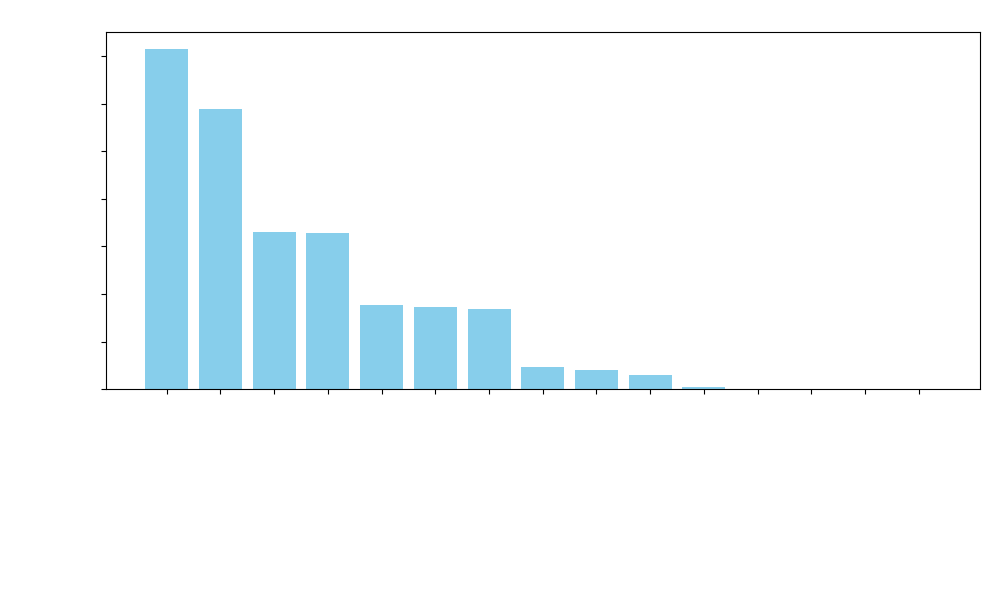

In [32]:
genre_counts = df['primary_genre'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(genre_counts.index, genre_counts, color="skyblue")
plt.xlabel("Primary Genre", color="white")
plt.ylabel("Count", color="white")
plt.title('Distribution of Games by Primary Genre', color="white")
plt.xticks(rotation=45, ha='right', fontsize=15, color='white')
plt.yticks(fontsize=15, color='white')
plt.gca().set_facecolor('none')
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.savefig('genre_distribution.png', transparent=True)
plt.show()

In [62]:
genre_counts


primary_genre
Indie (23)             17862
Action (1)             14723
Adventure (25)          8247
Casual (4)              8231
Strategy (2)            4443
Simulation (28)         4315
RPG (3)                 4191
Racing (9)              1142
Sports (18)             1012
Early Access (70)        759
Violent (73)              97
Sexual Content (71)       31
Gore (74)                 22
Nudity (72)               12
Education (54)             9
Name: count, dtype: int64

In [33]:
#Usunięcie niepotrzebnych kolumn
columns_to_drop = ['peak_players', 'detected_technologies']
df.drop(columns=columns_to_drop)

,Unnamed: 0,game,link,release,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,store_genres,publisher,developer,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date,rok,game_age
0,0,Pizza Tower,/app/2231450/,2023-01-26,19807,227,20034,96.39,Action (1),"Action (1), Indie (23)",Tour De Pizza,Tour De Pizza,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25,2023,1
1,1,Resident Evil 4,/app/2050650/,2023-03-24,61752,1616,63368,95.75,Action (1),"Action (1), Adventure (25)",CAPCOM Co. Ltd.,CAPCOM Co. Ltd.,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25,2023,1
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,12643,213,12856,95.54,Casual (4),"Casual (4), Free to Play (37), Indie (23), Sim...",SEGA,SEGA,2023-03-24,98.0,618,776,15543,2023-03-31,2023,1
3,3,Pineapple on pizza,/app/2263010/,2023-03-28,11717,209,11926,95.39,Indie (23),"Casual (4), Free to Play (37), Indie (23)",Majorariatto,Majorariatto,2023-03-22,98.0,101,101,1415,2023-03-28,2023,1
4,4,Hi-Fi RUSH,/app/1817230/,2023-01-25,14152,324,14476,95.09,Action (1),Action (1),Bethesda Softworks,Tango Gameworks,2023-04-11,97.0,630,664,6132,2023-01-29,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67564,67564,Earth 2160,/app/1900/,2006-04-01,878,375,1253,67.73,Strategy (2),Strategy (2),Topware Interactive,Reality Pump Studios,2019-12-23,70.0,13,17,9960,2018-04-12,2006,18
67565,67565,RoboBlitz,/app/4300/,2006-11-07,57,20,77,67.55,Action (1),"Action (1), Indie (23)",Naked Sky Entertainment,Naked Sky Entertainment,NaN,75.0,0,1,7,2014-04-27,2006,18
67566,67566,Space Empires V,/app/1690/,2006-10-16,290,120,410,67.34,Strategy (2),Strategy (2),Strategy First,Malfador Machinations,2019-10-29,70.0,8,12,137,2013-03-01,2006,18
67567,67567,Iron Warriors: T-72 Tank Command,/app/1670/,2006-07-26,173,104,277,60.17,Strategy (2),Strategy (2),Strategy First,Strategy First,2019-11-19,62.0,0,2,15,2014-03-01,2006,18


In [34]:
publisher_rating = df[['publisher', 'rating']]
publisher_rating = publisher_rating[publisher_rating['rating'] > 95.]
publisher_rating.groupby('publisher')[['rating']].mean().sort_values('rating', ascending=False)

lista = publisher_rating['publisher'].to_numpy()

In [35]:
df[df['publisher'].isin(lista)]

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,...,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date,rok,game_age
0,0,Pizza Tower,/app/2231450/,2023-01-26,4529,19807,227,20034,96.39,Action (1),...,Tour De Pizza,Engine.GameMaker; SDK.FMOD,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25,2023,1
1,1,Resident Evil 4,/app/2050650/,2023-03-24,168191,61752,1616,63368,95.75,Action (1),...,CAPCOM Co. Ltd.,Engine.RE_Engine; SDK.AMD_GPU_Services,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25,2023,1
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,15543,12643,213,12856,95.54,Casual (4),...,SEGA,Engine.Unity; SDK.UnityBurst; SDK.cURL,2023-03-24,98.0,618,776,15543,2023-03-31,2023,1
3,3,Pineapple on pizza,/app/2263010/,2023-03-28,1415,11717,209,11926,95.39,Indie (23),...,Majorariatto,Engine.Unity; SDK.cURL,2023-03-22,98.0,101,101,1415,2023-03-28,2023,1
4,4,Hi-Fi RUSH,/app/1817230/,2023-01-25,6132,14152,324,14476,95.09,Action (1),...,Tango Gameworks,Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...,2023-04-11,97.0,630,664,6132,2023-01-29,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67535,67535,Rocket Mania! Deluxe,/app/3440/,2006-08-30,17,67,3,70,83.04,Casual (4),...,PopCap Games Inc.,SDK.BASS,NaN,95.0,1,6,17,2018-03-22,2006,18
67537,67537,Bejeweled Deluxe,/app/3350/,2006-08-30,20,156,17,173,81.67,Casual (4),...,PopCap Games Inc.,SDK.BASS,2021-08-03,90.0,2,7,20,2009-01-24,2006,18
67538,67538,Zen of Sudoku,/app/4900/,2006-12-14,24,230,31,261,80.99,Casual (4),...,Unknown Worlds Entertainment,SDK.BASS; SDK.cURL,NaN,88.0,5,16,24,2018-12-01,2006,18
67546,67546,Hammer Heads Deluxe,/app/3400/,2006-08-30,10,50,6,56,77.65,Casual (4),...,PopCap Games Inc.,SDK.BASS,NaN,89.0,0,2,10,2019-01-01,2006,18


In [36]:
#Grupowanie po wieku gry i obliczanie średniej liczby recenzji w grupie.
srednia_wg_wieku = df.groupby('game_age')[['total_reviews']].mean().reset_index()
srednia_wg_wieku

,game_age,total_reviews
0,1,344.466440
1,2,531.174876
2,3,683.436625
3,4,1124.066816
4,5,1028.414607
5,6,1135.737008
6,7,1091.884661
7,8,1955.162830
8,9,3611.483294
9,10,2503.110045


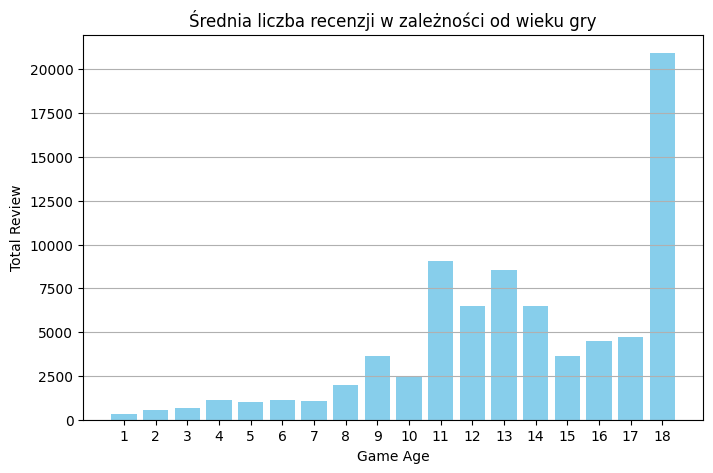

In [37]:
plt.figure(figsize=(8, 5))
plt.bar(srednia_wg_wieku['game_age'], srednia_wg_wieku['total_reviews'], color='skyblue')
plt.xlabel('Game Age')
plt.ylabel('Total Review')
plt.title('Średnia liczba recenzji w zależności od wieku gry')
plt.xticks(srednia_wg_wieku['game_age'])
plt.grid(axis='y')
plt.show()

In [38]:
#Grupowanie po rodzaju gry i obliczanie średniej liczby recenzji w grupie.
srednia_wg_rodzaju = df.groupby('primary_genre')[['total_reviews']].mean().reset_index()
srednia_ocena_wg_rodzaju = df.groupby('primary_genre')[['rating']].mean().reset_index()

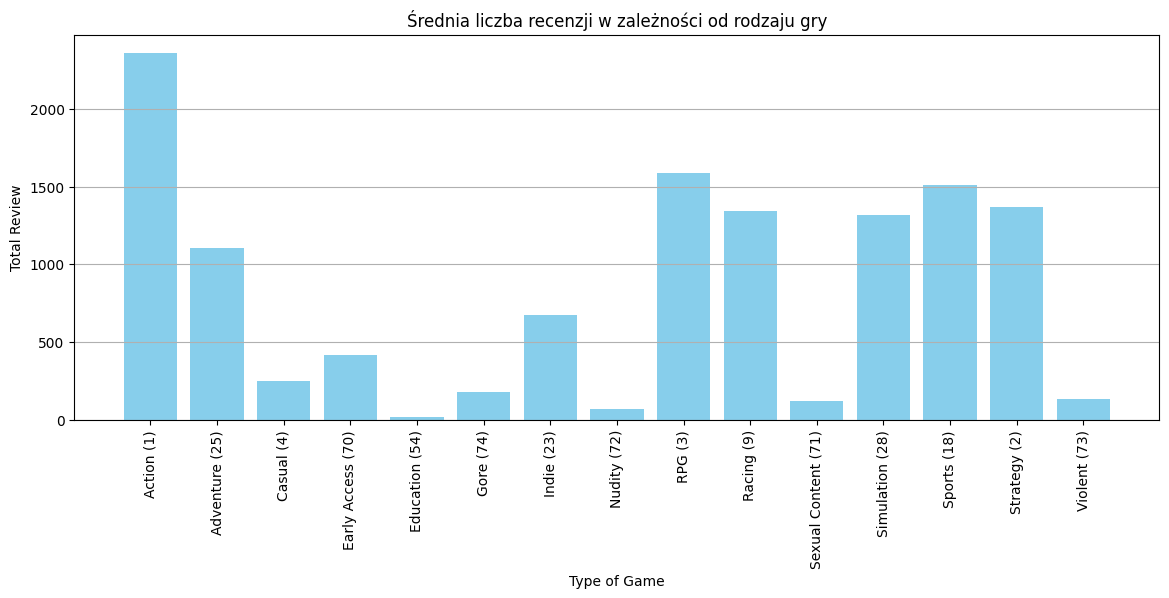

In [39]:
plt.figure(figsize=(14, 5))
plt.bar(srednia_wg_rodzaju['primary_genre'], srednia_wg_rodzaju['total_reviews'], color='skyblue')
plt.xlabel('Type of Game')
plt.ylabel('Total Review')
plt.title('Średnia liczba recenzji w zależności od rodzaju gry')
plt.xticks(srednia_wg_rodzaju['primary_genre'], rotation='vertical')
plt.grid(axis='y')
plt.show()

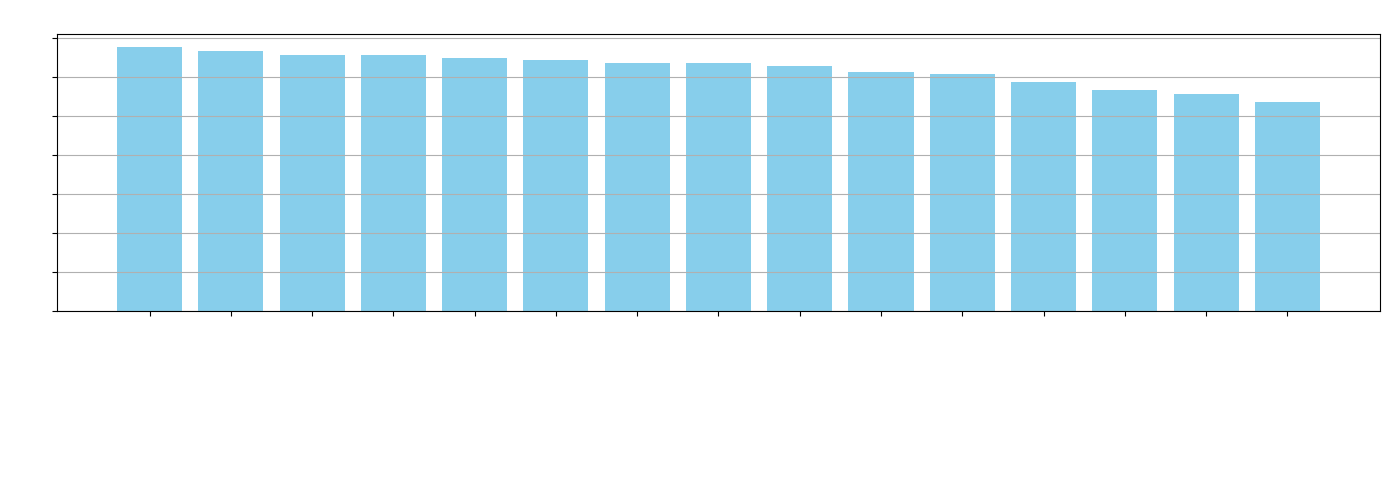

In [61]:
srednia_ocena_wg_rodzaju_sorted = srednia_ocena_wg_rodzaju.sort_values(by='rating', ascending=False)

plt.figure(figsize=(14, 5))
plt.bar(srednia_ocena_wg_rodzaju_sorted['primary_genre'], srednia_ocena_wg_rodzaju_sorted['rating'], color='skyblue')
plt.xlabel('Type of Game', color="white")
plt.ylabel('Total Review', color="white")
plt.title('Średnia ocena gry w zależności od kategorii', color="white")
plt.xticks(srednia_ocena_wg_rodzaju_sorted['primary_genre'], rotation='vertical', color="white")
plt.yticks(color='white')
plt.grid(axis='y')
plt.gca().set_facecolor('none')
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.savefig('srednia_ocena_category.png', transparent=True)
plt.show()

In [64]:
so = srednia_ocena_wg_rodzaju.sort_values('rating',ascending=False)

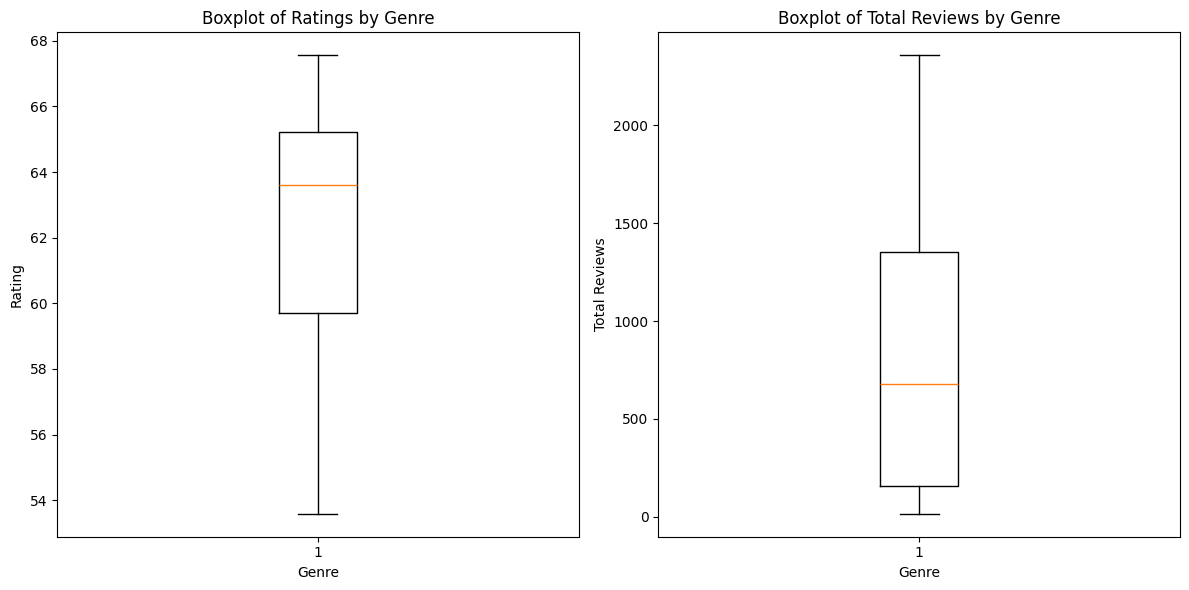

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].boxplot(srednia_ocena_wg_rodzaju['rating'])
axes[0].set_title('Boxplot of Ratings by Genre')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Rating')

axes[1].boxplot(srednia_wg_rodzaju['total_reviews'])
axes[1].set_title('Boxplot of Total Reviews by Genre')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Total Reviews')

plt.tight_layout()
plt.show()

In [43]:
total_review_genre = df[['primary_genre', "total_reviews"]]
rating_genre = df[['primary_genre', "rating"]]

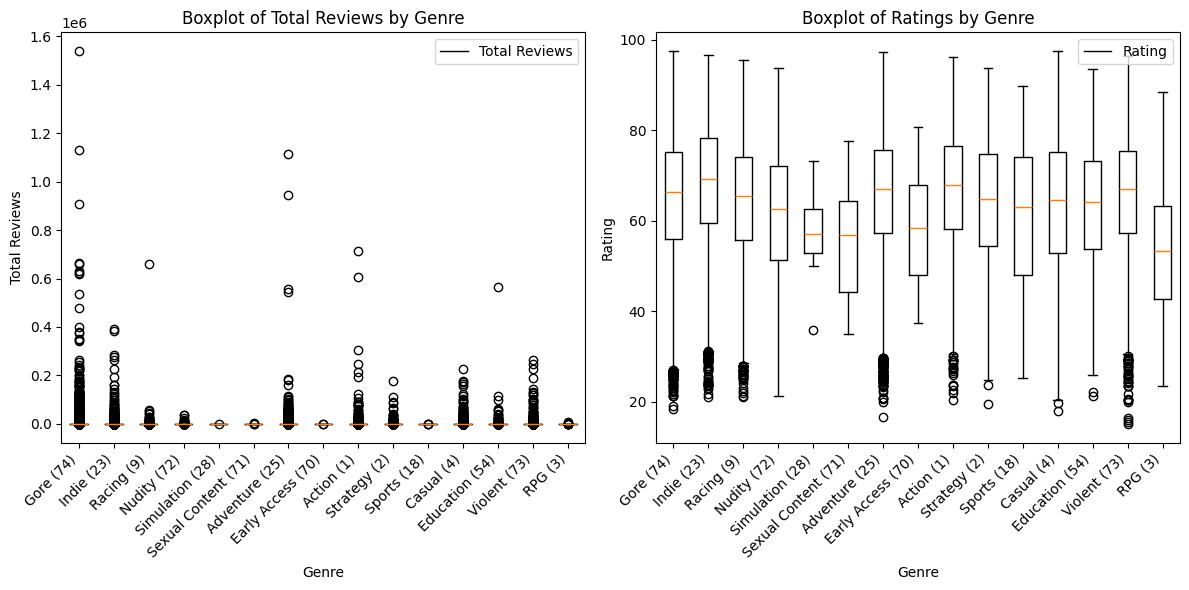

In [44]:
common_genres = set(total_review_genre['primary_genre'].unique()) | set(rating_genre['primary_genre'].unique())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].boxplot([group['total_reviews'] for name, group in total_review_genre.groupby('primary_genre')])
axes[0].set_title('Boxplot of Total Reviews by Genre')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Total Reviews')

axes[1].boxplot([group['rating'] for name, group in rating_genre.groupby('primary_genre')])
axes[1].set_title('Boxplot of Ratings by Genre')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Rating')

axes[0].set_xticklabels(common_genres, rotation=45, ha='right')
axes[1].set_xticklabels(common_genres, rotation=45, ha='right')

axes[0].legend(['Total Reviews'], loc='upper right')
axes[1].legend(['Rating'], loc='upper right')

plt.tight_layout()
plt.show()

In [45]:
total_reviews_mean_std = total_review_genre.groupby('primary_genre')['total_reviews'].agg(['mean', 'std'])
rating_mean_std = rating_genre.groupby('primary_genre')['rating'].agg(['mean', 'std'])

total_reviews_mean_std.columns = ['total_reviews_mean', 'total_reviews_std']
rating_mean_std.columns = ['rating_mean', 'rating_std']

result_df = pd.concat([total_reviews_mean_std, rating_mean_std], axis=1)
result_df.reset_index(inplace=True)
result_df

,primary_genre,total_reviews_mean,total_reviews_std,rating_mean,rating_std
0,Action (1),2358.608640,25656.141752,64.874466,14.244379
1,Adventure (25),1103.341215,10389.139915,67.561084,14.213256
2,Casual (4),248.671850,7387.085364,64.269843,13.376141
3,Early Access (70),415.743083,2329.082322,61.346574,14.226317
4,Education (54),15.444444,27.152859,56.623333,10.421101
5,Gore (74),178.772727,457.372614,55.752727,13.191957
6,Indie (23),676.668234,13118.155672,65.594101,13.719686
7,Nudity (72),68.833333,90.415036,58.588333,12.778732
8,RPG (3),1584.757814,17192.666726,66.577058,13.821603
9,Racing (9),1345.365149,8321.112792,63.674335,14.315252


In [46]:
#Posortowanie bazy2 wg wieku gry i w tych grupach wg rodzaju. Obliczenie średniej total_reviews i uszeregowanie rodzajów od największej średniej.
posortowana_baza2 = df[df['total_reviews'] >10000].sort_values(by=['game_age', 'primary_genre'])
średnia_baza2 = posortowana_baza2.groupby(['game_age', 'primary_genre'])['total_reviews'].mean().reset_index()
posortowana_średnia = średnia_baza2.sort_values(by=['game_age', 'total_reviews'], ascending=[True, False])
posortowana_średnia

,game_age,primary_genre,total_reviews
1,1,Adventure (25),64783.500000
0,1,Action (1),44748.166667
3,1,Indie (23),25372.666667
4,1,RPG (3),20477.000000
6,1,Strategy (2),15084.000000
...,...,...,...
123,17,Strategy (2),14899.000000
125,18,Indie (23),945444.000000
127,18,Strategy (2),27515.000000
124,18,Action (1),19998.000000


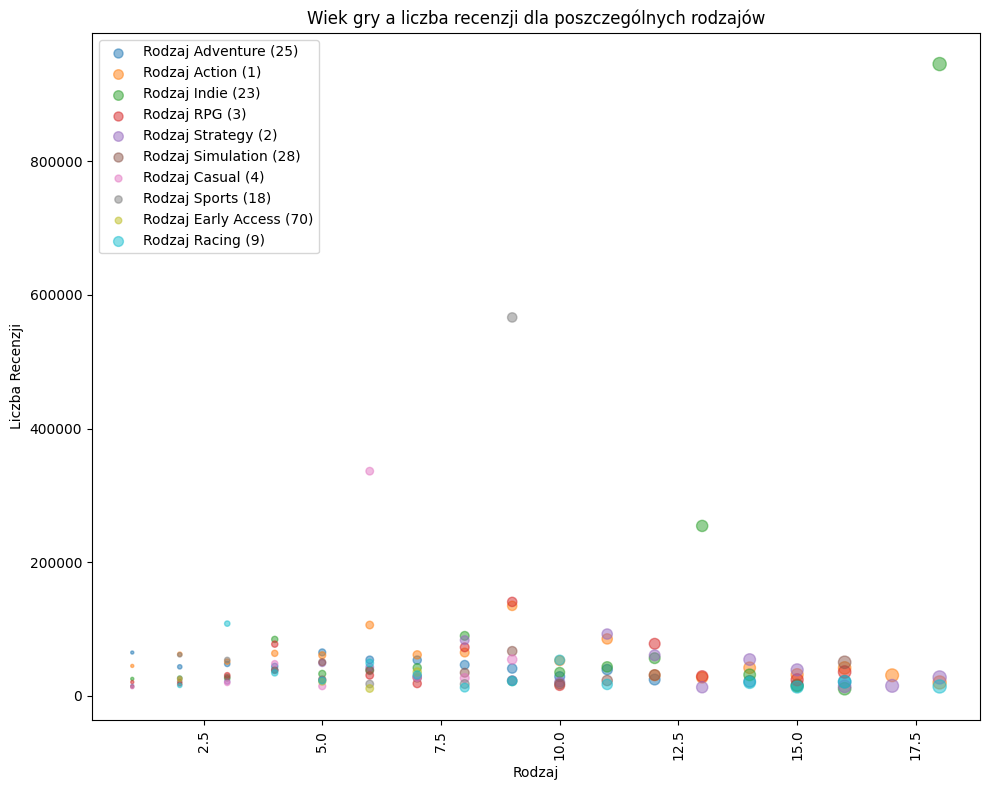

In [47]:
# W wykresie wielkość kropek jest proporcjonalne do wieku gry.
plt.figure(figsize=(10,8))
for rodzaj in posortowana_średnia['primary_genre'].unique():
    data = posortowana_średnia[posortowana_średnia['primary_genre'] == rodzaj]
    plt.scatter(data['game_age'], data['total_reviews'], s=data['game_age']*5, label=f'Rodzaj {rodzaj}', alpha=0.5)
plt.xlabel('Rodzaj')
plt.ylabel('Liczba Recenzji')
plt.title('Wiek gry a liczba recenzji dla poszczególnych rodzajów')
plt.xticks(rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()

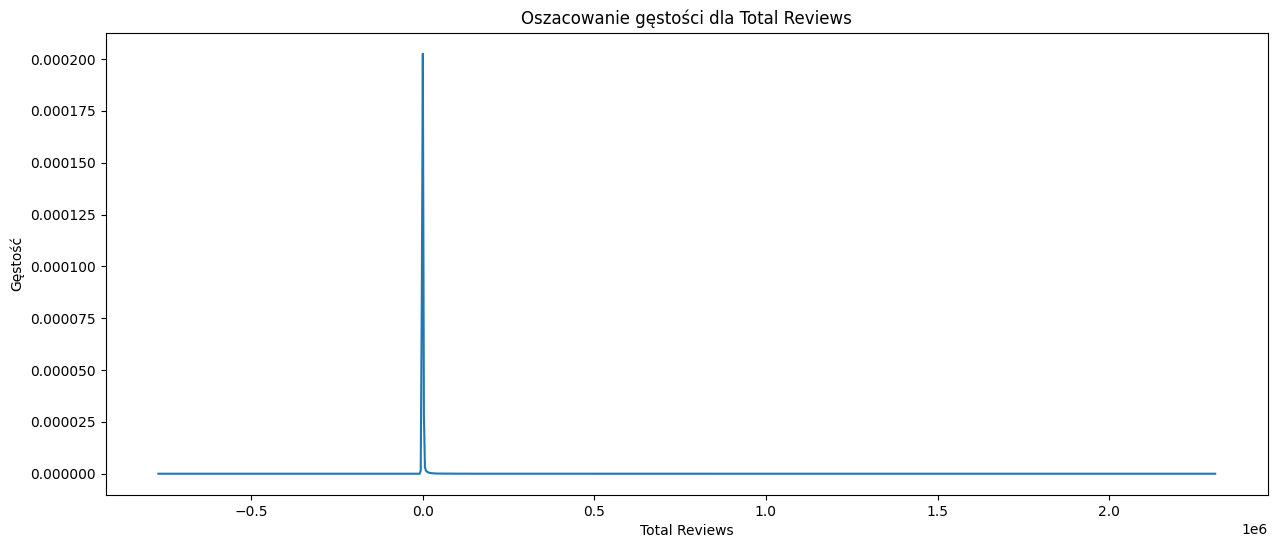

In [48]:
#Kernel Density Estimate
plt.figure(figsize=(15,6))
df['total_reviews'].plot(kind='kde')
plt.xlabel('Total Reviews')
plt.ylabel('Gęstość')
plt.title('Oszacowanie gęstości dla Total Reviews')
plt.show()

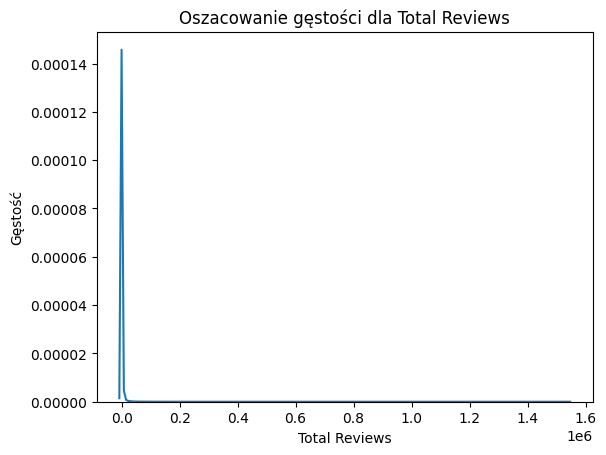

In [49]:
sns.kdeplot(df['total_reviews'], bw_adjust=1.5)
plt.xlabel('Total Reviews')
plt.ylabel('Gęstość')
plt.title('Oszacowanie gęstości dla Total Reviews')
plt.show()

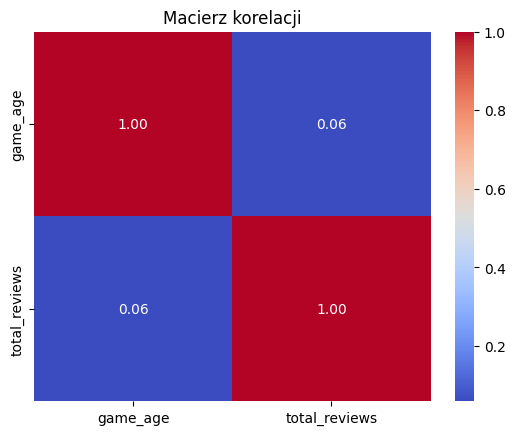

In [50]:
# Macierz korelacji
correlation_matrix = df[['game_age', 'total_reviews']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

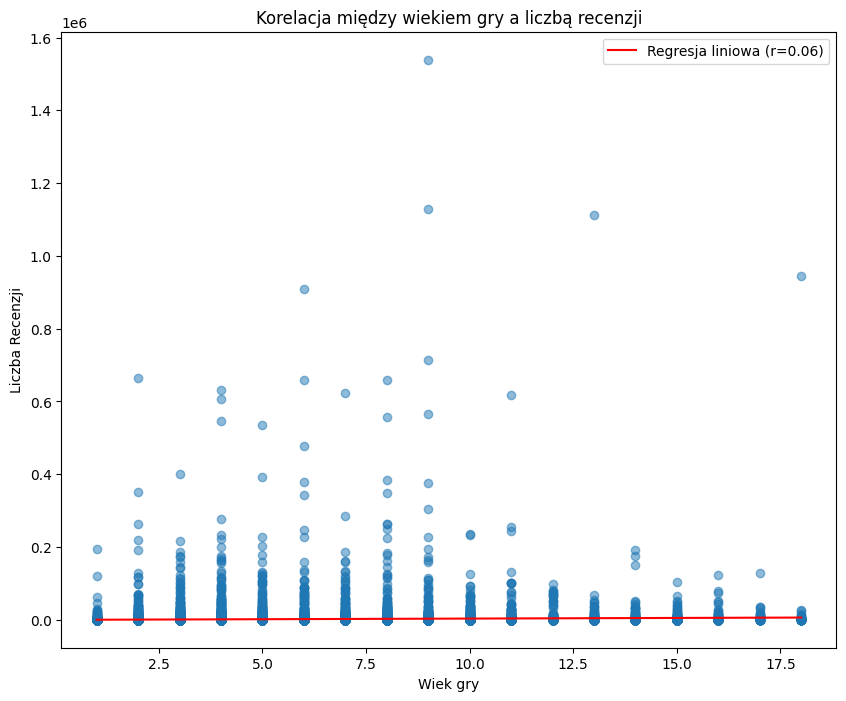

In [51]:
#Regresja liniowa:
slope, intercept, r_value, p_value, std_err = st.linregress(df['game_age'], df['total_reviews'])
line = slope * df['game_age'] + intercept

plt.figure(figsize=(10, 8))
plt.scatter(df['game_age'], df['total_reviews'], alpha=0.5)
plt.plot(df['game_age'], line, color='red', label=f'Regresja liniowa (r={r_value:.2f})')
plt.xlabel('Wiek gry')
plt.ylabel('Liczba Recenzji')
plt.title('Korelacja między wiekiem gry a liczbą recenzji')
plt.legend()
plt.show()

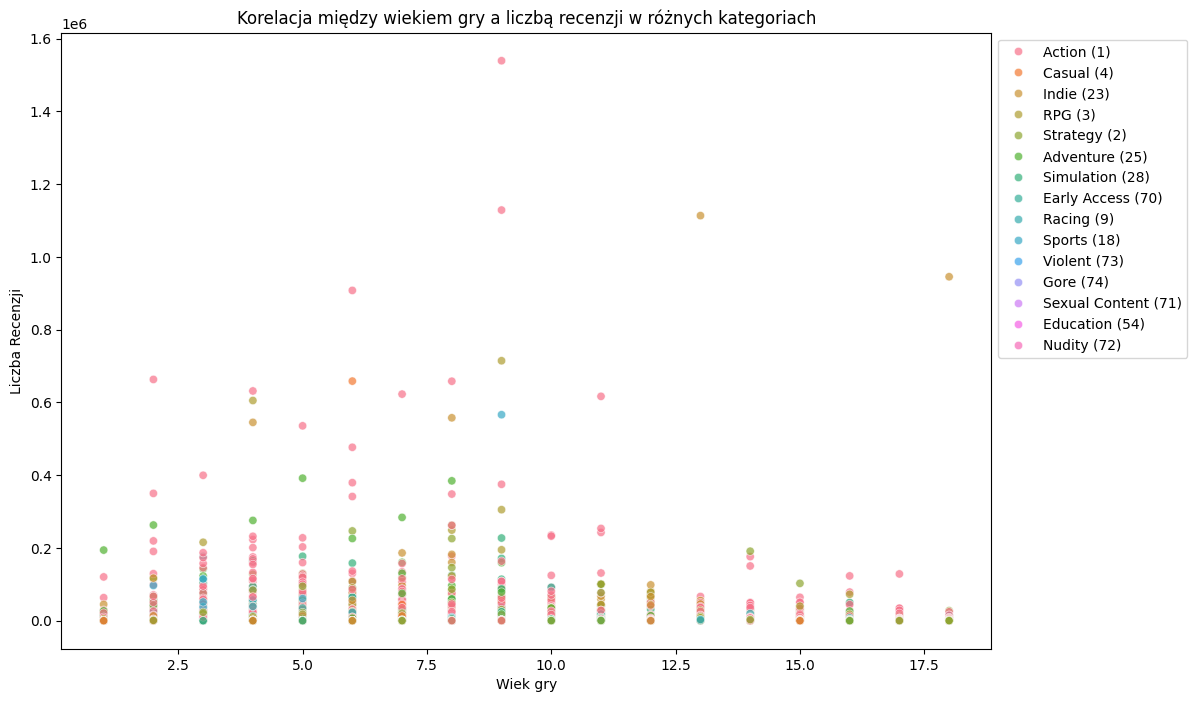

In [52]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='game_age', y='total_reviews', hue='primary_genre', data=df, alpha=0.7)
plt.xlabel('Wiek gry')
plt.ylabel('Liczba Recenzji')
plt.title('Korelacja między wiekiem gry a liczbą recenzji w różnych kategoriach')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

C:\Users\Wojciech\AppData\Local\Temp\ipykernel_12980\3260542451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='game', y='total_reviews', data=top_recenzowane, palette='viridis')


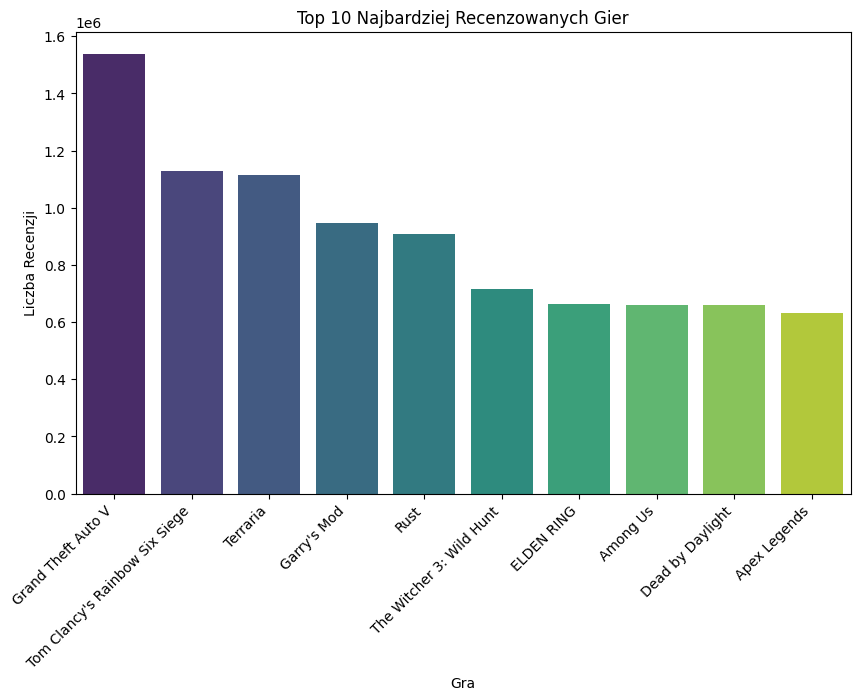

C:\Users\Wojciech\AppData\Local\Temp\ipykernel_12980\3260542451.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='game', y='rating', data=top_oceniane, palette='magma')


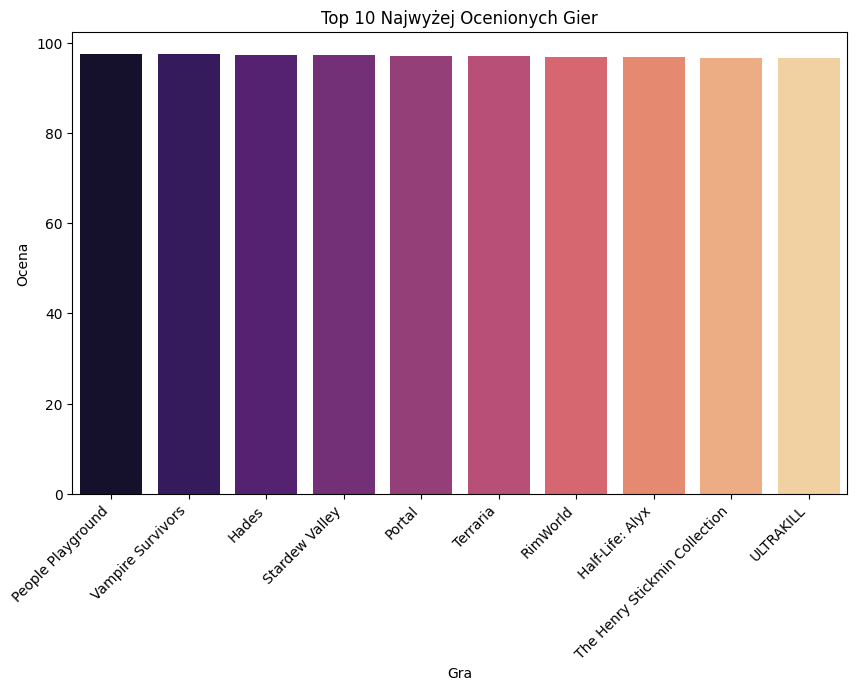

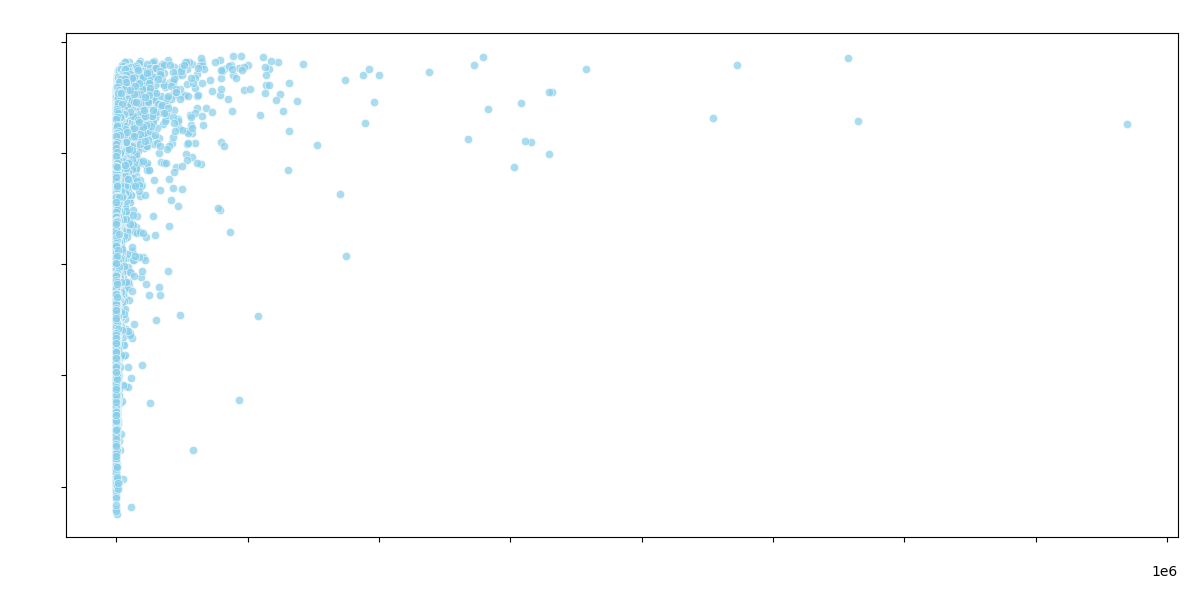

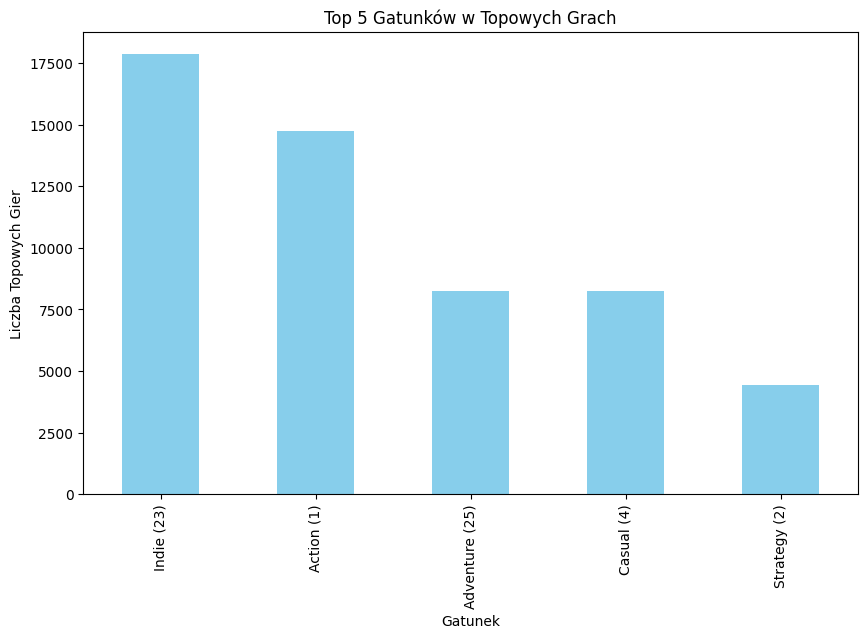

In [68]:

# 1. Ranking Najbardziej Recenzowanych Gier
top_recenzowane = df.sort_values(by='total_reviews', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='game', y='total_reviews', data=top_recenzowane, palette='viridis')
plt.title('Top 10 Najbardziej Recenzowanych Gier')
plt.xlabel('Gra')
plt.ylabel('Liczba Recenzji')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Ranking Najwyżej Ocenionych Gier
top_oceniane = df.sort_values(by='rating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='game', y='rating', data=top_oceniane, palette='magma')
plt.title('Top 10 Najwyżej Ocenionych Gier')
plt.xlabel('Gra')
plt.ylabel('Ocena')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Zróżnicowanie Recenzji i Ocen
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_reviews', y='rating', data=df, alpha=0.7, color="skyblue")
plt.title('Zróżnicowanie Recenzji i Ocen', color="white")
plt.xlabel('Liczba Recenzji', color="white")
plt.ylabel('Ocena', color="white")
plt.xticks(color="white")
plt.yticks(color='white')
plt.gca().set_facecolor('none')
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.savefig('zroznicowanie_recenzji_i_ocen.png', transparent=True)
plt.show()

# 4. Gatunki Dominujące w Topowych Grach
top_gatunki = df.groupby('primary_genre')['game'].count().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_gatunki.plot(kind='bar', color='skyblue')
plt.title('Top 5 Gatunków w Topowych Grach')
plt.xlabel('Gatunek')
plt.ylabel('Liczba Topowych Gier')
plt.show()

C:\Users\Wojciech\AppData\Local\Temp\ipykernel_12980\2595760544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranking_ocen.index, y=ranking_ocen.values, palette='viridis')


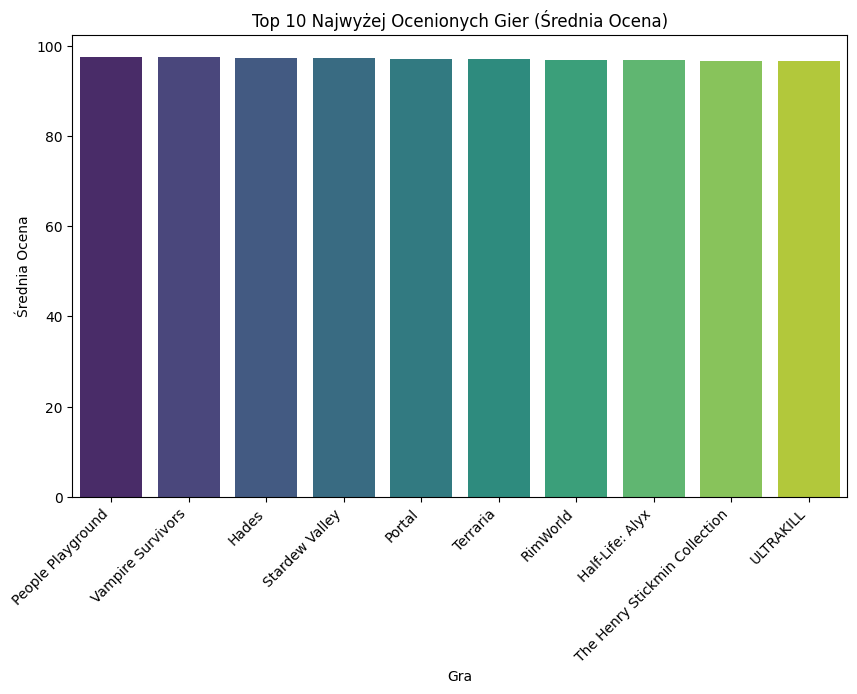

In [54]:

# Stwórz ranking Najwyżej Ocenionych Gier na podstawie średnich ocen
ranking_ocen = df.groupby('game')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=ranking_ocen.index, y=ranking_ocen.values, palette='viridis')
plt.title('Top 10 Najwyżej Ocenionych Gier (Średnia Ocena)')
plt.xlabel('Gra')
plt.ylabel('Średnia Ocena')
plt.xticks(rotation=45, ha='right')
plt.show()

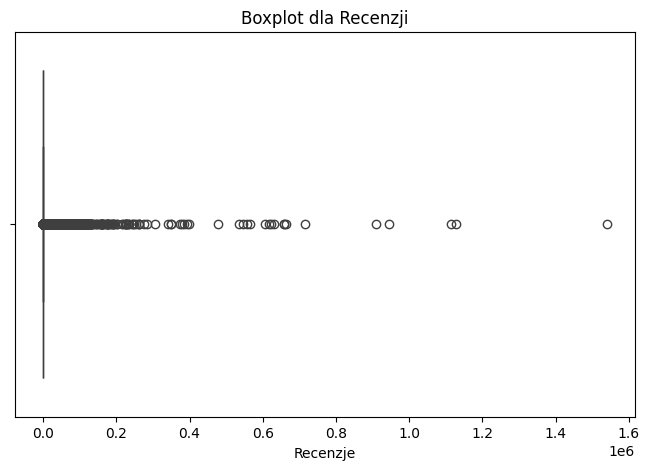

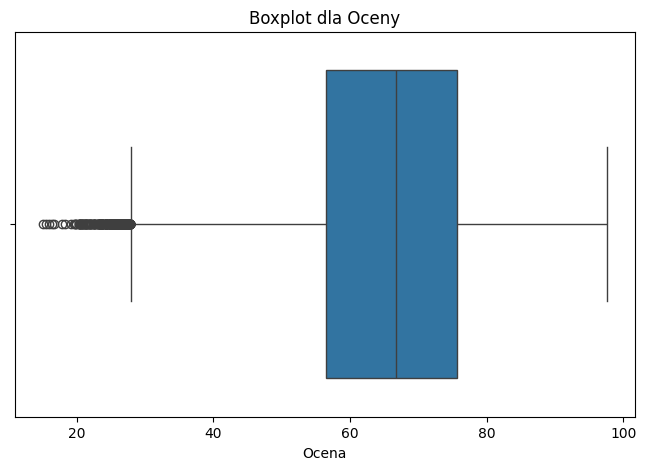

In [55]:
# Analiza odległości od średniej dla recenzji
mean_reviews = df['total_reviews'].mean()
std_reviews = df['total_reviews'].std()
threshold_reviews = mean_reviews + 2 * std_reviews  # Przykładowy próg odległości (można dostosować)

outliers_reviews = df[df['total_reviews'] > threshold_reviews]

# Analiza odległości od średniej dla ocen
mean_rating = df['rating'].mean()
std_rating = df['rating'].std()
threshold_rating = mean_rating - 2 * std_rating  # Przykładowy próg odległości (można dostosować)

outliers_rating = df[df['rating'] < threshold_rating]

# Wykres skrzynkowy (box plot) dla recenzji
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['total_reviews'])
plt.title('Boxplot dla Recenzji')
plt.xlabel('Recenzje')
plt.show()

# Wykres skrzynkowy (box plot) dla ocen
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['rating'])
plt.title('Boxplot dla Oceny')
plt.xlabel('Ocena')
plt.show()                                                                                                                          

In [56]:
                            # #Statystyki opisowe dla total_reviews.
# df['total_reviews'].describe()

In [57]:
# column_indexes = df.columns #inny sposob na sprawdzenie indeksow
# print(column_indexes)

In [58]:
# column_position = df.columns.get_loc('Unnamed: 0') #przykładowo sprawdzamy pozycję danej kolumny
# column_position

In [59]:
# #Do wykorzystania po ustaleniu, które kolumny usuwamy


# pd.read_csv('sample.csv', skiprows=[0,2]) #-> pominiecie wierszy
# pd.read_csv('sample.csv', usecols=[0,1]) #-> wskazanie, ktore kolumny chcemy uzyc
# df = pd.read_csv('sample.csv', usecols=lambda column: column not in [1]) #wariacja do pomijania kolumn
# pd.read_csv('sample.csv', nrows=3) #-> ile wierszy chcemy wczytać, jesli plik jest duży
# pd.DataFrame.value_counts() - konkretne wartosci dyskretne

# columns_to_drop = ['B', 'D'] #usuwanie kolumn v.1
# df = df.drop(columns=columns_to_drop)

# column_to_skip = 'column' #usuwanie kolumn v.2
# df = df.drop(columns=[column_to_skip])